# Procesamiento de lenguaje natural (NLP)

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/NLP_pipeline.jpeg)
Fuente de la imagen: Turing.com

## 1. Segmentación de enunciados

![](https://s3.amazonaws.com/work-sample-images/blog_segmentation.jpg)
Fuente de la imagen: tm-town.com

## 2.  Tokenization

![](https://miro.medium.com/max/1400/1*UhfwmhMN9sdfcWIbO5_tGg.jpeg)
Fuente de la imagen: Medium.com

## 3. Stemming y  4. Lemmatization

![](https://miro.medium.com/max/640/1*HLQgkMt5-g5WO5VpNuTl_g.jpeg)
Fuente de la imagen: medium.com

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/stemmingvslemma.png)
Fuente de la imagen: businessprocessincubator.com


## 5. Stop words
![](https://user.oc-static.com/upload/2021/01/06/16099626487943_P1C2.png)
Fuente de la imagen: openclassrooms.com

## 6. Dependency parsing

(Análisis de dependencia). Se utiliza principalmente para averiguar cómo se relacionan entre sí todas las palabras de una oración. Para encontrar la dependencia, podemos construir un árbol y asignar una sola palabra como palabra principal. El verbo principal de la oración actuará como el nodo raíz.
![](https://files.realpython.com/media/displacy_dependency_parse.de72f9b1d115.png)
Fuente: RealPython.


## 7. Part of speech tagging

(Etiquetado de parte del discurso).

![](https://miro.medium.com/max/640/1*004yTJkoLe7g8KC8V7-ULw.png)
Fuente de la imagen: medium.com

![](https://www.researchgate.net/profile/Cigdem-Aytekin-3/publication/337773927/figure/fig1/AS:832915193733120@1575593865084/Natural-Language-Processing-Topics-Adali-2013-4.png)
Fuente de la imagen: Sutcu, Cem Sefa & Aytekin, Cigdem. (2019)

![](https://files.realpython.com/media/NLP-for-Beginners-Pythons-Natural-Language-Toolkit-NLTK_Watermarked.16a787c1e9c6.jpg)
Fuente de la imagen: realpython.com

In [1]:
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.tokenize.punkt import PunktSentenceTokenizer, PunktParameters
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\igome\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

### 1. Segmentación de enunciados

In [2]:
text = "An ambitious campus expansion plan was proposed by Fr. Vernon F. Gallagher in 1952. Assumption Hall, the first student dormitory, was opened in 1954, and Rockwell Hall was dedicated in November 1958, housing the schools of business and law. It was during the tenure of F. Henry J. McAnulty that Fr. Gallagher's ambitious plans were put to action."

In [3]:
# Training a new model with the text.
tokenizer = PunktSentenceTokenizer()
tokenizer.train(text)

In [4]:
# It automatically learns the abbreviations.
tokenizer._params.abbrev_types

set()

In [6]:
# Use the customized tokenizer.
tokenizer.tokenize(text)

['An ambitious campus expansion plan was proposed by Fr.',
 'Vernon F. Gallagher in 1952.',
 'Assumption Hall, the first student dormitory, was opened in 1954, and Rockwell Hall was dedicated in November 1958, housing the schools of business and law.',
 'It was during the tenure of F. Henry J. McAnulty that Fr.',
 "Gallagher's ambitious plans were put to action."]

### Tokenization

In [8]:
sent = "I will walk 500 miles and I would walk 500 more, just to be the man who walks a thousand miles to fall down at your door!"

In [9]:
print(word_tokenize(sent))

['I', 'will', 'walk', '500', 'miles', 'and', 'I', 'would', 'walk', '500', 'more', ',', 'just', 'to', 'be', 'the', 'man', 'who', 'walks', 'a', 'thousand', 'miles', 'to', 'fall', 'down', 'at', 'your', 'door', '!']


In [10]:
print(sent_tokenize(sent))

['I will walk 500 miles and I would walk 500 more, just to be the man who walks a thousand miles to fall down at your door!']


#### Stemming vs lemmatize

In [11]:
#Stemming vs lemmatize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

s_stemmer = SnowballStemmer(language='english')
words = ['run','runner','running','ran','runs','easily','fairly']
for word in words:
    print(word+' --> '+s_stemmer.stem(word))

run --> run
runner --> runner
running --> run
ran --> ran
runs --> run
easily --> easili
fairly --> fair


**Ejercicio: Probar con otra lista de palabras**

In [30]:
s_stemmer = SnowballStemmer(language='english')
lemmatizer = WordNetLemmatizer()
words = ['run','runner','running','ran','runs']

for word in words:
    print("Stemmer:")
    print(word+' --> '+s_stemmer.stem(word))
    print("Lemmatizer")
    print(word+' --> '+lemmatizer.lemmatize(word, pos='v'))    

Stemmer:
run --> run
Lemmatizer
run --> run
Stemmer:
runner --> runner
Lemmatizer
runner --> runner
Stemmer:
running --> run
Lemmatizer
running --> run
Stemmer:
ran --> ran
Lemmatizer
ran --> run
Stemmer:
runs --> run
Lemmatizer
runs --> run


### Ejemplo: combinando web scrapping con NLP

In [31]:
import nltk
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [32]:
url = "http://www.oralytics.com/"
html = urlopen(url).read()
print(html)

b'<!DOCTYPE html>\n<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="en"> <![endif]-->\n<!--[if IE 7]> <html class="no-js lt-ie9 lt-ie8" lang="en"> <![endif]-->\n<!--[if IE 8]> <html class="no-js lt-ie9" lang="en"> <![endif]-->\n<!--[if gt IE 8]><!--> <html class="no-js" lang="en"> <!--<![endif]-->\n<head>\n<meta charset="UTF-8">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>Oralytics</title>\n<link rel="profile" href="http://gmpg.org/xfn/11">\n<link rel="pingback" href="https://oralytics.com/xmlrpc.php">\n\n<meta name=\'robots\' content=\'max-image-preview:large\' />\n<meta name="google-site-verification" content="5_gehZ06ILCmVK6_yUuquF6FvfE2_DWklNxXChPDtmA" />\n<meta name="msvalidate.01" content="0BD71865719D64AC53DCB30DFD743DCA" />\n\n<!-- Async WordPress.com Remote Login -->\n<script id="wpcom_remote_login_js">\nvar wpcom_remote_login_extra_auth = \'\';\nfunction wpcom_remote_login_remove_dom_node_id( element_id ) {\n\tvar dom_node = d

In [33]:
soup = BeautifulSoup(html)
print(soup)

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="en"> <![endif]--><!--[if IE 7]> <html class="no-js lt-ie9 lt-ie8" lang="en"> <![endif]--><!--[if IE 8]> <html class="no-js lt-ie9" lang="en"> <![endif]--><!--[if gt IE 8]><!--><html class="no-js" lang="en"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Oralytics</title>
<link href="http://gmpg.org/xfn/11" rel="profile"/>
<link href="https://oralytics.com/xmlrpc.php" rel="pingback"/>
<meta content="max-image-preview:large" name="robots"/>
<meta content="5_gehZ06ILCmVK6_yUuquF6FvfE2_DWklNxXChPDtmA" name="google-site-verification"/>
<meta content="0BD71865719D64AC53DCB30DFD743DCA" name="msvalidate.01"/>
<!-- Async WordPress.com Remote Login -->
<script id="wpcom_remote_login_js">
var wpcom_remote_login_extra_auth = '';
function wpcom_remote_login_remove_dom_node_id( element_id ) {
	var dom_node = document.getElementById( element_id

In [34]:
# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract()    # rip it out
print(soup)

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="en"> <![endif]--><!--[if IE 7]> <html class="no-js lt-ie9 lt-ie8" lang="en"> <![endif]--><!--[if IE 8]> <html class="no-js lt-ie9" lang="en"> <![endif]--><!--[if gt IE 8]><!--><html class="no-js" lang="en"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Oralytics</title>
<link href="http://gmpg.org/xfn/11" rel="profile"/>
<link href="https://oralytics.com/xmlrpc.php" rel="pingback"/>
<meta content="max-image-preview:large" name="robots"/>
<meta content="5_gehZ06ILCmVK6_yUuquF6FvfE2_DWklNxXChPDtmA" name="google-site-verification"/>
<meta content="0BD71865719D64AC53DCB30DFD743DCA" name="msvalidate.01"/>
<!-- Async WordPress.com Remote Login -->

<link href="//s2.wp.com" rel="dns-prefetch"/>
<link href="//s1.wp.com" rel="dns-prefetch"/>
<link href="//oralytics.wordpress.com" rel="dns-prefetch"/>
<link href="//s0.wp.com" rel="dns-pre

In [35]:
text = soup.get_text()
print(text)

 



Oralytics




































































































Oralytics
By Brendan Tierney


-




Blog
My Books
Consulting Services
Oracle Icon Images
Data Sets

Scottish Whisky – Updated
Irish Whiskey Distilleries
CAO Points & Profiling since 2015
Leaving Certificate grade per Subject since 2015
Data Sets for Data Analytics/Science


My Shop
Contact Me
Oracle Magazine Collection
 




What does Legacy really mean? 

Posted on November 15, 2022 Updated on November 17, 2022 

In the IT industry we hear the term “legacy” being using, but that does it mean?  It can mean a lot of different things and it really depends on the person who is saying it, their context, what they want to portray and their intended meaning. In a lot of cases people seem to use it without knowing the meaning or the impact it can have. This can result in negative impact and not in the way the person intended.
 Before looking at some (and there can be lots) possi

In [36]:
# break into lines and remove leading and trailing space on each
lines = (line.strip() for line in text.splitlines())
# break multi-headlines into a line each
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
# drop blank lines
text = 'n'.join(chunk for chunk in chunks if chunk)

print(text)

OralyticsnOralyticsnBy Brendan Tierneyn-nBlognMy BooksnConsulting ServicesnOracle Icon ImagesnData SetsnScottish Whisky – UpdatednIrish Whiskey DistilleriesnCAO Points & Profiling since 2015nLeaving Certificate grade per Subject since 2015nData Sets for Data Analytics/SciencenMy ShopnContact MenOracle Magazine CollectionnWhat does Legacy really mean?nPosted on November 15, 2022 Updated on November 17, 2022nIn the IT industry we hear the term “legacy” being using, but that does it mean?nIt can mean a lot of different things and it really depends on the person who is saying it, their context, what they want to portray and their intended meaning. In a lot of cases people seem to use it without knowing the meaning or the impact it can have. This can result in negative impact and not in the way the person intended.nBefore looking at some (and there can be lots) possible meanings, lets have a look at what one person said recently.n“Migrating away from legacy databases like Oracle can seem li

In [37]:
#download and print the stop words for the English language
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print(stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\igome\AppData\Roaming\nltk_data...


{"wouldn't", 'more', 'the', 'yours', 'myself', 'hadn', 've', 'before', 'who', 'which', 'than', "couldn't", 'while', 'himself', 'there', 'both', 'now', 'o', 'and', 'too', 'doesn', "mightn't", 'have', 'herself', 'over', 'whom', 'no', 'with', 'are', 'won', 'you', 'haven', 'just', 'against', "that'll", 'some', 'wasn', 'ma', "needn't", 'll', 'their', 'an', 'once', 'hasn', 'through', 'on', 'it', 'this', 'very', 'y', 'out', "don't", 'theirs', 'above', 'during', 'not', 'but', "should've", 'then', 'these', 'couldn', 'all', 'ours', "she's", 'i', 'those', 'did', 'd', 'in', "doesn't", 'at', 'being', 'when', "shan't", 'having', 'he', 'most', "weren't", 'his', "you'll", 'we', 'should', 'yourself', 'isn', 'been', 'themselves', 'to', 'down', 'of', 'any', 'few', 't', 'my', 'they', "mustn't", 'mightn', 'our', 'be', 'for', 'is', 'shan', "hadn't", 'into', 'she', "shouldn't", 'what', 'such', 'between', 'her', 'yourselves', 'needn', 'were', 'off', 'its', 'under', 'if', 'where', 'a', 'shouldn', "won't", 'wou

[nltk_data]   Unzipping corpora\stopwords.zip.


In [42]:
#tokenise the data set
from nltk.tokenize import sent_tokenize, word_tokenize
words = word_tokenize(text)
len(words), words

(8897,
 ['OralyticsnOralyticsnBy',
  'Brendan',
  'Tierneyn-nBlognMy',
  'BooksnConsulting',
  'ServicesnOracle',
  'Icon',
  'ImagesnData',
  'SetsnScottish',
  'Whisky',
  '–',
  'UpdatednIrish',
  'Whiskey',
  'DistilleriesnCAO',
  'Points',
  '&',
  'Profiling',
  'since',
  '2015nLeaving',
  'Certificate',
  'grade',
  'per',
  'Subject',
  'since',
  '2015nData',
  'Sets',
  'for',
  'Data',
  'Analytics/SciencenMy',
  'ShopnContact',
  'MenOracle',
  'Magazine',
  'CollectionnWhat',
  'does',
  'Legacy',
  'really',
  'mean',
  '?',
  'nPosted',
  'on',
  'November',
  '15',
  ',',
  '2022',
  'Updated',
  'on',
  'November',
  '17',
  ',',
  '2022nIn',
  'the',
  'IT',
  'industry',
  'we',
  'hear',
  'the',
  'term',
  '“',
  'legacy',
  '”',
  'being',
  'using',
  ',',
  'but',
  'that',
  'does',
  'it',
  'mean',
  '?',
  'nIt',
  'can',
  'mean',
  'a',
  'lot',
  'of',
  'different',
  'things',
  'and',
  'it',
  'really',
  'depends',
  'on',
  'the',
  'person',
  'w

In [44]:
# Quita mayusculas, puntuación y numeros
wordsFiltered = [word.lower() for word in words if word.isalpha()]
len(wordsFiltered), wordsFiltered

(7007,
 ['oralyticsnoralyticsnby',
  'brendan',
  'booksnconsulting',
  'servicesnoracle',
  'icon',
  'imagesndata',
  'setsnscottish',
  'whisky',
  'updatednirish',
  'whiskey',
  'distilleriesncao',
  'points',
  'profiling',
  'since',
  'certificate',
  'grade',
  'per',
  'subject',
  'since',
  'sets',
  'for',
  'data',
  'shopncontact',
  'menoracle',
  'magazine',
  'collectionnwhat',
  'does',
  'legacy',
  'really',
  'mean',
  'nposted',
  'on',
  'november',
  'updated',
  'on',
  'november',
  'the',
  'it',
  'industry',
  'we',
  'hear',
  'the',
  'term',
  'legacy',
  'being',
  'using',
  'but',
  'that',
  'does',
  'it',
  'mean',
  'nit',
  'can',
  'mean',
  'a',
  'lot',
  'of',
  'different',
  'things',
  'and',
  'it',
  'really',
  'depends',
  'on',
  'the',
  'person',
  'who',
  'is',
  'saying',
  'it',
  'their',
  'context',
  'what',
  'they',
  'want',
  'to',
  'portray',
  'and',
  'their',
  'intended',
  'meaning',
  'in',
  'a',
  'lot',
  'of

In [46]:
# remove stop words from tokenised data set
filtered_words = [word for word in wordsFiltered if word not in stopwords.words('english')]
len(filtered_words), filtered_words

(3591,
 ['oralyticsnoralyticsnby',
  'brendan',
  'booksnconsulting',
  'servicesnoracle',
  'icon',
  'imagesndata',
  'setsnscottish',
  'whisky',
  'updatednirish',
  'whiskey',
  'distilleriesncao',
  'points',
  'profiling',
  'since',
  'certificate',
  'grade',
  'per',
  'subject',
  'since',
  'sets',
  'data',
  'shopncontact',
  'menoracle',
  'magazine',
  'collectionnwhat',
  'legacy',
  'really',
  'mean',
  'nposted',
  'november',
  'updated',
  'november',
  'industry',
  'hear',
  'term',
  'legacy',
  'using',
  'mean',
  'nit',
  'mean',
  'lot',
  'different',
  'things',
  'really',
  'depends',
  'person',
  'saying',
  'context',
  'want',
  'portray',
  'intended',
  'meaning',
  'lot',
  'cases',
  'people',
  'seem',
  'use',
  'without',
  'knowing',
  'meaning',
  'impact',
  'result',
  'negative',
  'impact',
  'way',
  'person',
  'looking',
  'lots',
  'possible',
  'meanings',
  'lets',
  'look',
  'one',
  'person',
  'said',
  'migrating',
  'away',


Docs: http://amueller.github.io/word_cloud/

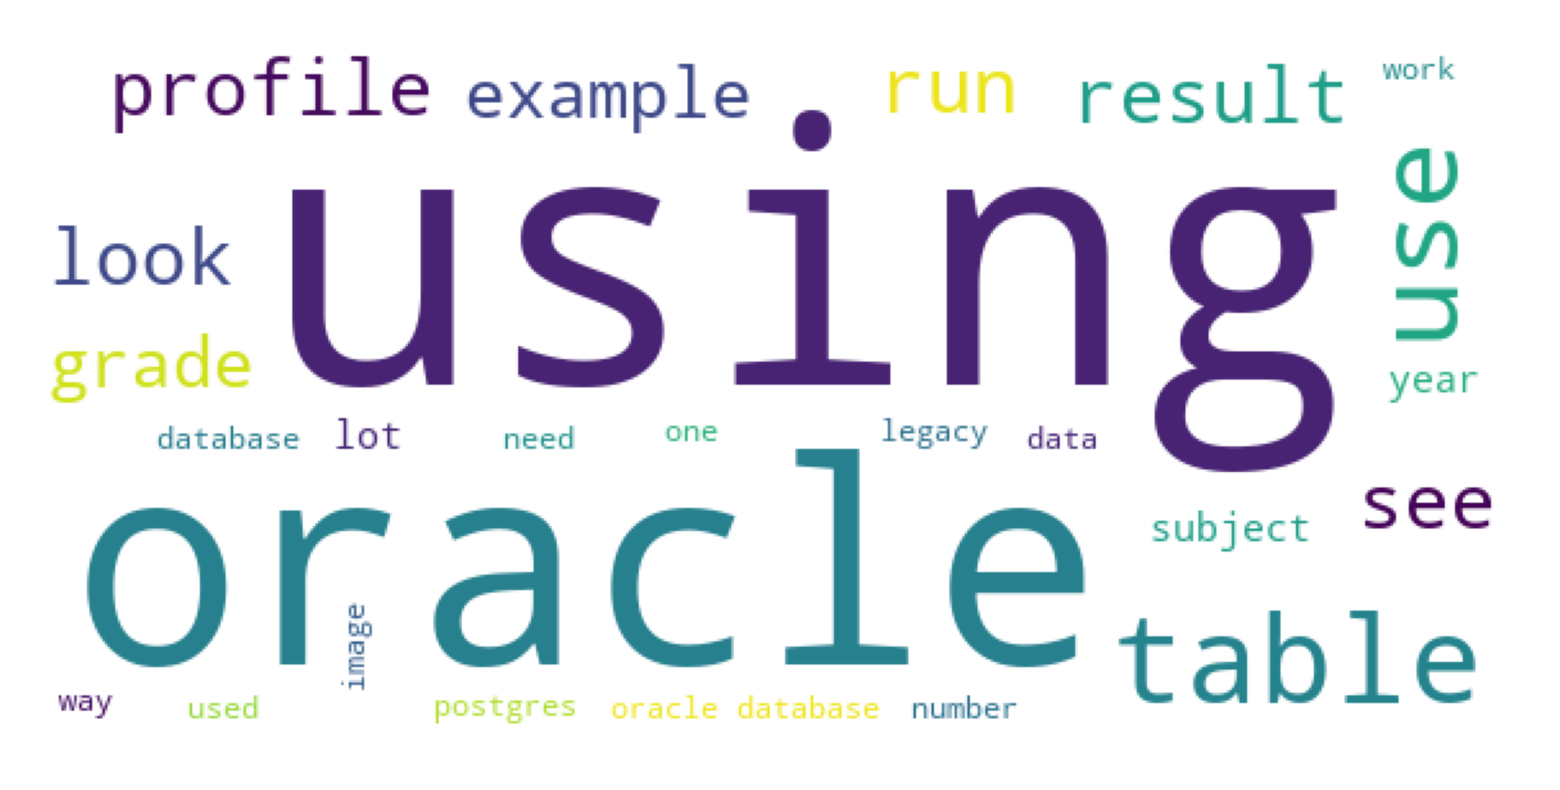

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(max_words=100, margin=10, background_color='white',
scale=3, relative_scaling = 0.5, width=200, height=100,
random_state=1).generate(' '.join(filtered_words))

plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

#### Ejercicio: usar otra página u archivo de texto para hacer nube de palabras

### Spicy

![](https://miro.medium.com/max/720/1*5RZ1Saa-R7LKN30UoTL5ZA.png)
Fuente: Medium

En colab: 
    
    !python -m spacy download es_core_news_sm

    !python -m spacy download en_core_web_sm

En local y remoto:

    python3 -m spacy download es_core_news_sm

    python3 -m spacy download en_core_web_sm

In [15]:
import es_core_news_sm
nlp = es_core_news_sm.load()

In [16]:
import spacy
nlp = spacy.load('en_core_web_sm')
nlp_es = spacy.load('es_core_news_sm')

In [17]:
doc = nlp_es('"Vamos por unos tacos!"')
for token in doc:
    print(token.text)

"
Vamos
por
unos
tacos
!
"


In [18]:
sentence = nlp(u'Googles monthly revenue is $6 million')

for token in sentence:
    print(token.text, end=' | ')


for ent in sentence.ents:
    print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))

Googles | monthly | revenue | is | $ | 6 | million | Googles - PERSON - People, including fictional
monthly - DATE - Absolute or relative dates or periods
$6 million - MONEY - Monetary values, including unit


In [19]:
sentence = nlp_es(u'Mexicanos al grito de guerra, al sonoro rugir del cañón')

for token in sentence:
    print(token.text, end=' | ')


for ent in sentence.ents:
    print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))

Mexicanos | al | grito | de | guerra | , | al | sonoro | rugir | del | cañón | Mexicanos - LOC - Non-GPE locations, mountain ranges, bodies of water


In [20]:
from spacy import displacy
doc = nlp(u'Over last few years USA generates $6 million revenue.')
displacy.render(doc, style='ent', jupyter=True)

In [21]:
doc = nlp_es(u'El producto interno de México en 2021 fue de $1,293 billones USD')
displacy.render(doc, style='ent', jupyter=True)

In [22]:
# ver dependencias
from spacy import displacy
document = nlp(u'Bangladesh is a beautiful country')
displacy.render(document, style='dep', jupyter=True, options={'distance': 110})

In [23]:
document = nlp_es(u'Mexicanos al grito de guerra, al sonoro rugir del cañón')
displacy.render(document, style='dep', jupyter=True, options={'distance': 110})

In [24]:
## Lematizacion
doc = nlp(u"He is a runner running in a competition because he loves to run since he ran today")

for token in doc:
    print(f'{token.text:{12}} {token.pos_:{6}} {token.lemma:<{22}} {token.lemma_}')

He           PRON   1655312771067108281    he
is           AUX    10382539506755952630   be
a            DET    11901859001352538922   a
runner       NOUN   12640964157389618806   runner
running      VERB   12767647472892411841   run
in           ADP    3002984154512732771    in
a            DET    11901859001352538922   a
competition  NOUN   4661638505416061516    competition
because      SCONJ  16950148841647037698   because
he           PRON   1655312771067108281    he
loves        VERB   3702023516439754181    love
to           PART   3791531372978436496    to
run          VERB   12767647472892411841   run
since        SCONJ  10066841407251338481   since
he           PRON   1655312771067108281    he
ran          VERB   12767647472892411841   run
today        NOUN   11042482332948150395   today


In [25]:
print(nlp.Defaults.stop_words)

{'more', 'much', 'other', 'get', 'did', 'can', 'here', 'could', 'to', 'down', 'ours', 'is', 'regarding', 'an', 'had', 'until', 'per', 'anywhere', 'hers', 'fifty', 'four', 'whether', 'nine', 'nothing', 'from', 'out', 'last', 'himself', 'nevertheless', 'would', 'name', 'indeed', 'least', 'seemed', 'but', 'amount', 'how', 'hundred', 'its', 'my', 'whither', '’ll', 'become', 'except', '‘re', 'very', "n't", 'alone', 'cannot', 'both', 'of', 'around', 'forty', 'through', 'the', 'however', 'are', 'yourselves', 'quite', 'somewhere', 'give', 'seems', 'sometimes', 'rather', 'doing', 'throughout', 'who', 'onto', 'call', 'off', 'even', 'those', 'everywhere', "'s", 'almost', 'anything', 'or', 'many', 'such', "'d", 'using', 'these', 'really', "'ll", 'ever', 'was', 'though', 'behind', 'between', 'besides', 'same', 'whereupon', 'something', 'whereas', 'thence', 'one', 'then', 'for', 'keep', 'next', 'wherein', 'perhaps', 'nowhere', 'your', '‘m', 'just', 'mostly', 'serious', 'whom', 'up', 'afterwards', 'n

In [26]:
print(nlp_es.Defaults.stop_words)

{'éstas', 'aunque', 'agregó', 'buenas', 'tenemos', 'ella', 'realizar', 'vuestra', 'teneis', 'lo', 'comentó', 'estar', 'mucho', 'ellos', 'estará', 'primera', 'próximo', 'detrás', 'mejor', 'pero', 'pasada', 'tus', 'junto', 'voy', 'habia', 'les', 'primeros', 'manifestó', 'poder', 'ello', 'somos', 'desde', 'mayor', 'así', 'como', 'aún', 'dio', 'hizo', 'algo', 'cual', 'adelante', 'contra', 'eran', 'podrá', 'paìs', 'haceis', 'quiere', 'mias', 'tenga', 'algún', 'todavía', 'hacen', 'ahi', 'respecto', 'menos', 'muchas', 'tenido', 'consideró', 'añadió', 'cuales', 'uno', 'han', 'unas', 'días', 'él', 'pasado', 'asi', 'buenos', 'o', 'cuántos', 'siendo', 'se', 'hasta', 'hicieron', 'mismo', 'largo', 'ahora', 'porque', 'aquélla', 'ante', 'mediante', 'verdadera', 'medio', 'dias', 'pesar', 'quizás', 'aproximadamente', 'haber', 'ningunos', 'ha', 'cuando', 'detras', 'después', 'dijeron', 'quien', 'hoy', 'estaban', 'poca', 'bueno', 'podrán', 'vamos', 'segundo', 'mal', 'del', 'puedo', 'tienen', 'vosotros', 

In [27]:
nlp.vocab['myself'].is_stop

True

In [28]:
nlp.vocab['mystery'].is_stop

False

In [29]:
nlp_es.vocab['pero'].is_stop

True

In [30]:
nlp_es.vocab['palabra'].is_stop

False

## Ejercicio, buscar 5 palabras en español que sean stop_words

### Explorando mas: Utilizando las palabras como vectores

https://www.kaggle.com/code/zackakil/nlp-using-word-vectors-with-spacy-cldspn/notebook

![](https://raw.githubusercontent.com/ZackAkil/nlp-using-word-vectors/master/images/cosine_similarity.png)

![](https://raw.githubusercontent.com/ZackAkil/nlp-using-word-vectors/master/images/cosine1.png)

In [31]:
vector1 = nlp('animal').vector
vector2 = nlp('cat').vector

In [33]:
import numpy as np
np.dot(vector1, vector2) 

39.06379

In [34]:
documents = (
"The sky is blue",
"The sun is bright",
"The sun in the sky is bright",
"We can see the shining sun, the bright sun"
)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
tfidf_matrix.shape

(4, 11)

In [36]:
print(tfidf_matrix[0:1])

  (0, 0)	0.6591911178676787
  (0, 4)	0.42075315164463567
  (0, 7)	0.5197138488789809
  (0, 9)	0.3439932714296342


In [37]:
nlp("The sky is blue").vector

array([-0.06157592, -0.19569114,  0.10899872, -0.2589952 ,  0.6165202 ,
       -0.13194907,  0.27776998,  0.12944697,  0.13755691, -0.22583699,
       -0.29199654,  0.36910787, -0.13348386, -0.18428084, -0.09036143,
       -0.17353189,  0.11832502,  0.6103339 ,  0.582059  , -0.7738596 ,
       -0.01938073, -0.00702386,  0.43915775, -0.02219313,  0.2786805 ,
       -0.1811554 ,  0.8115313 , -0.5520633 , -0.4417286 ,  0.42390913,
       -0.9174702 ,  0.00660411, -0.61748135,  0.0372366 , -0.33591002,
        0.57895786, -0.04548243, -0.39379656, -0.20753789,  0.18551594,
        0.01590073,  0.7059409 ,  0.2605993 , -0.6381691 , -0.42152268,
       -0.33216992,  0.10520068,  0.43517527,  0.20966952, -0.18406868,
       -0.30843174, -0.5749721 ,  0.06702945,  0.48101646, -0.38797644,
        0.3858698 ,  0.15091482, -0.10510081,  0.10495134,  0.52850056,
        1.0047379 , -0.51848906,  0.50775015,  0.09689064, -0.04035793,
       -0.6233886 , -0.34556714,  0.00966697, -0.48252186, -0.77

Hulk True 9.766293 True
Superman True 8.079615 True
Batman True 8.367569 True
dragon True 7.880517 True
elf True 7.535157 True
dance True 7.8063774 True
musical True 7.8075147 True
handsome True 7.598592 True
romance True 7.5300794 True
war True 8.206624 True
soldier True 7.9641376 True
['Hulk', 'Superman', 'Batman', 'dragon', 'elf', 'dance', 'musical', 'handsome', 'romance', 'war', 'soldier']


/tmp/ipykernel_33017/144270138.py:14: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  M[idx, idy] = token1.similarity(token2)


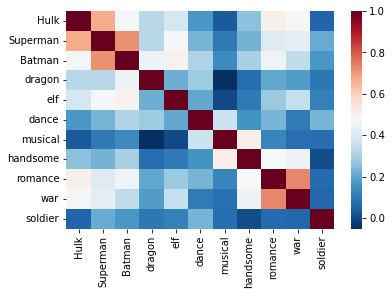

In [43]:
# nlp = spacy.load("en_core_web_md")
import seaborn 
tokens = nlp(u'Hulk Superman Batman dragon elf dance musical handsome romance war soldier')

for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

labels = [a.text for a in tokens]
print(labels)

M = np.zeros((len(tokens), len(tokens)))
for idx, token1 in enumerate(tokens):
    for idy, token2 in enumerate(tokens):
        M[idx, idy] = token1.similarity(token2)

%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt


ax = sns.heatmap(M, cmap = "RdBu_r", xticklabels=labels,  yticklabels=labels)
plt.show()


### Combinando con sklearn

In [38]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(tfidf_matrix[0:1], tfidf_matrix)

array([[1.        , 0.36651513, 0.52305744, 0.13448867]])

In [39]:
# import the PCA module from sklearn
from sklearn.decomposition import PCA

# this is just making sure we have loaded in our word vectors
if 'nlp' not in locals():
    nlp = spacy.load('en_core_web_lg')

def get_word_vectors(words):
    # converts a list of words into their word vectors
    return [nlp(word).vector for word in words]

words = ['car', 'truck', 'dragon', 'data', 'horse', 'fish' , 'lion']

# intialise pca model and tell it to project data down onto 2 dimensions
pca = PCA(n_components=2)

# fit the pca model to our 300D data, this will work out which is the best 
# way to project the data down that will best maintain the relative distances 
# between data points. It will store these intructioons on how to transform the data.
pca.fit(get_word_vectors(words))

# Tell our (fitted) pca model to transform our 300D data down onto 2D using the 
# instructions it learnt during the fit phase.
word_vecs_2d = pca.transform(get_word_vectors(words))

# let's look at our new 2D word vectors
word_vecs_2d

array([[-5.45558462e-01, -1.22132577e-01],
       [-2.94256204e+00, -1.89810995e-02],
       [ 4.50865739e+00, -1.26351536e+00],
       [ 1.79795780e+00,  3.71831135e+00],
       [-3.03293976e+00,  3.79200742e-01],
       [ 2.12598002e-01,  2.08655864e-01],
       [ 1.84707614e-03, -2.90153892e+00]])

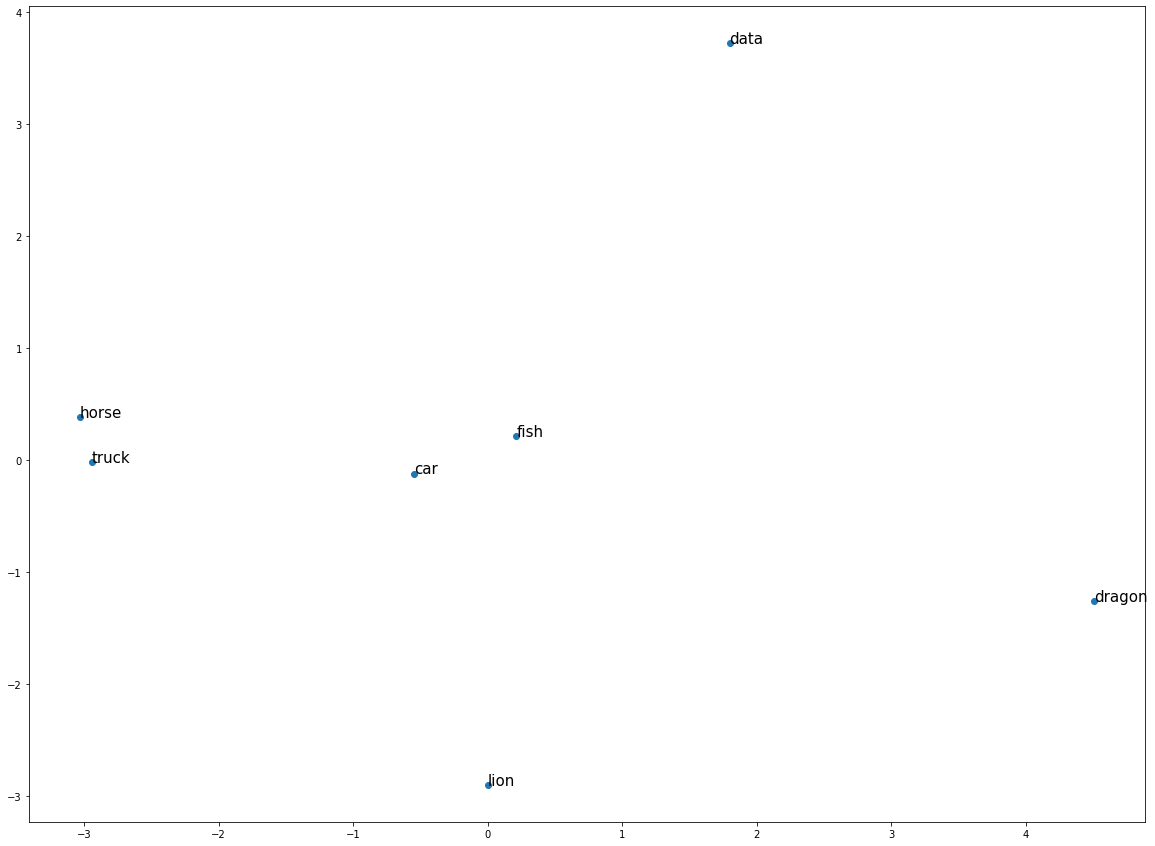

In [40]:
# create a nice big plot 
plt.figure(figsize=(20,15))

# plot the scatter plot of where the words will be
plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1])

# for each word and coordinate pair: draw the text on the plot
for word, coord in zip(words, word_vecs_2d):
    x, y = coord
    plt.text(x, y, word, size= 15)

# show the plot
plt.show()

### Ejercicio: Probar PCA con más palabras